# MapReduce Lab
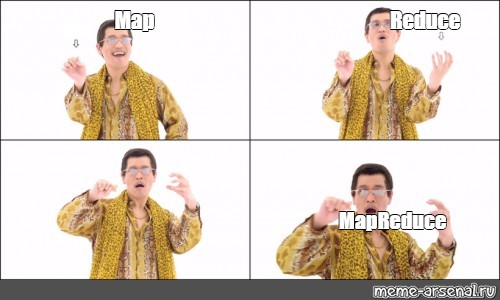

## Overview

In this lab you will explore PySpark and achieve the following:


*  Learn about PySpark, RDDs, Operations, and Lambda functions.
*  Learn about `map`, `flatMap`, `reduceByKey`, `sortByKey`, and `collect`.
*  Learn the building blocks for `join`. 




Let's start by installing and importing PySpark in our notebook.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 检查pyspark 是否装好
from pyspark import SparkContext
from pyspark import SparkConf
sc = SparkContext()
data = list(range(1, 1000))
rdd = sc.parallelize(data)
rdd.collect()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [1]:
# from pyspark import SparkContext

## Task 1: Learning about RDDs, Operations, and Lambda functions

In the following tasks, you will complete a simple Spark program: count the number of words of various lengths in a file. In this lab you can find the following text in the file sonnet1.txt: 

```
From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And, tender churl, mak'st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.
```

Under the folder icon in the left side of the notebook, **upload the sonnet1.txt file** found in lab handout.

Now, let's create a spark context.

In [2]:
sc = SparkContext()

Reading the text file will create a **Spark RDD (Resilient Distributed Dataset)** by default. Here we use **collect()** to convert the RDD into a Python object for easy output.

In [4]:
lines = sc.textFile("./sonnet1.txt").collect()
lines

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: java.io.IOException: Failed on local exception: com.google.protobuf.InvalidProtocolBufferException: Message missing required fields: callId, status; Host Details : local host is: "Yishuais-MacBook-Pro.local/127.0.0.1"; destination host is: "localhost":9000; 
	at org.apache.hadoop.net.NetUtils.wrapException(NetUtils.java:776)
	at org.apache.hadoop.ipc.Client.call(Client.java:1479)
	at org.apache.hadoop.ipc.Client.call(Client.java:1412)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Invoker.invoke(ProtobufRpcEngine.java:229)
	at com.sun.proxy.$Proxy22.getFileInfo(Unknown Source)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolTranslatorPB.getFileInfo(ClientNamenodeProtocolTranslatorPB.java:771)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invokeMethod(RetryInvocationHandler.java:191)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invoke(RetryInvocationHandler.java:102)
	at com.sun.proxy.$Proxy23.getFileInfo(Unknown Source)
	at org.apache.hadoop.hdfs.DFSClient.getFileInfo(DFSClient.java:2108)
	at org.apache.hadoop.hdfs.DistributedFileSystem$22.doCall(DistributedFileSystem.java:1305)
	at org.apache.hadoop.hdfs.DistributedFileSystem$22.doCall(DistributedFileSystem.java:1301)
	at org.apache.hadoop.fs.FileSystemLinkResolver.resolve(FileSystemLinkResolver.java:81)
	at org.apache.hadoop.hdfs.DistributedFileSystem.getFileStatus(DistributedFileSystem.java:1317)
	at org.apache.hadoop.fs.Globber.getFileStatus(Globber.java:57)
	at org.apache.hadoop.fs.Globber.glob(Globber.java:252)
	at org.apache.hadoop.fs.FileSystem.globStatus(FileSystem.java:1676)
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:259)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:229)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:315)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:204)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:745)
Caused by: com.google.protobuf.InvalidProtocolBufferException: Message missing required fields: callId, status
	at com.google.protobuf.UninitializedMessageException.asInvalidProtocolBufferException(UninitializedMessageException.java:81)
	at com.google.protobuf.AbstractParser.checkMessageInitialized(AbstractParser.java:71)
	at com.google.protobuf.AbstractParser.parseDelimitedFrom(AbstractParser.java:253)
	at com.google.protobuf.AbstractParser.parseDelimitedFrom(AbstractParser.java:259)
	at com.google.protobuf.AbstractParser.parseDelimitedFrom(AbstractParser.java:49)
	at org.apache.hadoop.ipc.protobuf.RpcHeaderProtos$RpcResponseHeaderProto.parseDelimitedFrom(RpcHeaderProtos.java:3167)
	at org.apache.hadoop.ipc.Client$Connection.receiveRpcResponse(Client.java:1086)
	at org.apache.hadoop.ipc.Client$Connection.run(Client.java:979)


Using **parallelize()**, we can distribute a local Python collection to form an RDD. In this example, we will divide the data into 128 slices, convert the list to a Spark RDD, use the python **type()** function to identify the object type, and use a built-in method for the object to count the number of lines.

In [ ]:
lines = sc.parallelize(lines, 128)
print(type(lines))
print(lines.count())
lines.take(3)

<class 'pyspark.rdd.RDD'>
14


['From fairest creatures we desire increase,',
 "That thereby beauty's rose might never die,",
 'But as the riper should by time decease,']

Let's now use a **flatMap()** spark transformation to split the sentences into words. This does two tasks: the mapping part will split each string into a list of strings, and the flattening part will combine all the lists into one. 

In [ ]:
words = lines.flatMap(lambda x: x.split(' '))
print(type(words))
print(words.count())
words.take(15)

<class 'pyspark.rdd.PipelinedRDD'>
106


['From',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase,',
 'That',
 'thereby',
 "beauty's",
 'rose',
 'might',
 'never',
 'die,',
 'But',
 'as']

Let's count the number of words of various lengths -- for example, how many words with exactly 10 characters are used in the sonnet? We will modify the **map()** function so that it creates pairs of `(word-length, 1)` for each instance.

This is a common "column-oriented" method for counting instances in a parallelizable way, with the first element ("key") of the tuple being the thing that you want to count, and the second element ("value") being a count 1 so you can aggregate these 1 counts later on.

Run the code to define `pairs` and see what the first five elements that are mapped from `words` look like.

In [ ]:
pairs = words.map(lambda x: (len(x),1))
pairs.take(5)

[(4, 1), (7, 1), (9, 1), (2, 1), (6, 1)]

Next, we need to aggregate these counts. Luckily, there's a handy function we can import called **add()**. The add function is a simple helper that, well, adds things.

In [ ]:
from operator import add
print(add(5, 2))
add([1, 2, 3], [4, 5, 6])

7


[1, 2, 3, 4, 5, 6]

The **reduceByKey()** function called on `add` will do a transformation in which the parallelizable method (`add`) will aggregate all the instances in pairs. In other words, it will add / tally up the number of words that have the same size - the same key.

In [ ]:
wordsize = pairs.reduceByKey(add)
print(type(wordsize))
print(wordsize.count())
wordsize.take(5)

<class 'pyspark.rdd.PipelinedRDD'>
12


[(1, 1), (2, 10), (3, 25), (4, 20), (5, 17)]

Next, using `.collect()`, we can convert the RDD `wordsize` into a Python object for an easier output.

In [ ]:
output = wordsize.collect()
print(type(output))
output

<class 'list'>


[(1, 1),
 (2, 10),
 (3, 25),
 (4, 20),
 (5, 17),
 (6, 13),
 (7, 10),
 (8, 3),
 (9, 4),
 (10, 1),
 (11, 1),
 (16, 1)]

In this case, the elements of output are sorted by key. However, this will not always be the case; usually, output from a pipeline like this will be out of order, since the collect() action is parallelized, and then the results are assembled. This is a special case, where we're only using one worker node, so the results will be ordered for us. If we needed to order the results, we could use the Spark **sortByKey()** method to sort the pairs before collecting them into a list. Perhaps unexcitingly, we will once again see a sorted list!

In [ ]:
output = wordsize.sortByKey().collect()
output

[(1, 1),
 (2, 10),
 (3, 25),
 (4, 20),
 (5, 17),
 (6, 13),
 (7, 10),
 (8, 3),
 (9, 4),
 (10, 1),
 (11, 1),
 (16, 1)]

Congratulations! You have just run your first Spark program. The following lines of code recreate exactly what you did in the previous steps. At each step you executed one Spark transformation on one RDD which returns results in a separate RDD.

In [ ]:
sc.stop()

sc = SparkContext()
lines = sc.textFile("sonnet1.txt").collect()
lines = sc.parallelize(lines, 128) 
words = lines.flatMap(lambda x: x.split(' '))
pairs = words.map(lambda x: (len(x), 1))
wordsize = pairs.reduceByKey(add)
output = wordsize.sortByKey().collect()
output

[(1, 1),
 (2, 10),
 (3, 25),
 (4, 20),
 (5, 17),
 (6, 13),
 (7, 10),
 (8, 3),
 (9, 4),
 (10, 1),
 (11, 1),
 (16, 1)]

To allow Spark to perform its magic, the program needs to build a chain of transformations using the dot operator. When it is passed to Spark in this way, Spark understands the multiple steps and that the results of one transformation are to be passed to the next transformation. This allows Spark to organize the processing in any way it decides based on the resources available in the cluster. So, while the above program is more readable, with the variables "words", "pairs", and "wordsize" removed, the following program does the same thing without naming the intermediate results. They are functionally identical.

In [ ]:
output2 = lines.flatMap(lambda x: x.split(' ')).map(lambda x: (len(x), 1)).reduceByKey(add).sortByKey().collect()
sc.stop()
output2

[(1, 1),
 (2, 10),
 (3, 25),
 (4, 20),
 (5, 17),
 (6, 13),
 (7, 10),
 (8, 3),
 (9, 4),
 (10, 1),
 (11, 1),
 (16, 1)]

Now that you've seen a bit of PySpark's functionality, it's time for you to explore some of its different functions.

##Task 2: Run PySpark Functions 

In the previous example, you should have noticed how we used `map`, `flatMap`, `sortByKey` and `reduceByKey` in different parts of the pipeline. Before you attempt to use these functions yourself, let's go through them in more detail.

In general, PySpark documentation for all of these function can be found here: https://spark.apache.org/docs/1.1.1/api/python/pyspark.rdd.RDD-class.html.

###map

The `map` function returns a map object of the results after applying a given function to each one of the items in the given iterable. Note that it produces one new element in the new iterable per element in the given iterable.

###flatMap

Whereas `map` applies a function to each element in the list and produces one element, `flatMap` takes one element from the original element and produces zero, one, or more elements in the new iterable. Therefore, `map` expresses a one-to-one transformation on the original iterable, whereas `flatMap` expresses a one-to-many transformation.

The difference between `map` and `flatmap` can be tricky so we recommend you spend some time thinking about it. In addition, here is a great resource that can help: https://data-flair.training/blogs/apache-spark-map-vs-flatmap/. For a specific use case, we found that this thread was great: https://stackoverflow.com/questions/22350722/what-is-the-difference-between-map-and-flatmap-and-a-good-use-case-for-each/37875830.

###sortByKey

`sortByKey` returns the given RDD sorted according to each element’s key. The function can sort in ascending, descending, or custom order. Note that for this function to work, your RDD must be in key-value pair format. For more, see this article: https://sparkbyexamples.com/apache-spark-rdd/spark-sortbykey-with-rdd-example/ (the programming language used isn’t Python, but the explanations can be really helpful in understanding how to use the function). 


###reduceByKey

Like `sortByKey`, `reduceByKey` only works on RDDs which are in key-value pair formats. The function merges the values of each key via a provided associative function. Think of it as a way of regrouping your data such that key-value pairs with the same key are grouped together. For more, see: https://sparkbyexamples.com/apache-spark-rdd/spark-reducebykey-usage-with-examples/.

Now that you've learned more about each function, it's time to build your own pipeline to **count the number words that start with each character in the entry1.txt file.** In other words, you will create an output of `(first letter, number of words that start with this letter)` pairs. First, initialize your SparkContext.

In [ ]:
sc = SparkContext()

Now, **upload entry1.txt** to the notebook's file. After that, read the file into an RDD and then into a Python object.

In [ ]:
#Hint: Refer to Task 1 if you forgot the function that transforms our data into
#a Python object.
entry = ?

entry

We will now parallelize into an RDD and divide our data into 128 slices. 

In [ ]:
entry = ?

entry

Next, you will want to transform the entry into separate words. 

In [ ]:
#Hint: Which function can you use to achieve this efficiently? 
words = ?

print(words.count())
assert(words.count() == 1329)
words.take(15)

In this pipeline, we only care about the first letter of each word. As such, we need to transform our words to be the first letter of each word. One of the powerful aspects of the PySpark functions is that you can write your own functions and use them to `map`, `sort`, and `reduce`. Here, we have written the function that will transform each word entry into its lowercased first character. All you have to do now is use it with one of the PySpark functions.

In [ ]:
def getFirstLetter(a):
  yield a.lower()[0]

words = ?

assert(words.count() == 1329)
words.take(15)

Now, use one of the PySpark functions to create a pair of `(character, 1)` for each lowercased first character from each word.

In [ ]:
#Hint: which mapping function can you leverage to do this task? Remember that this function will have to take in a lambda expression.
pairs = ?

assert(words.count() == 1329)
pairs.take(15)

You can now aggregate your pairs to see the total number of words that start with the same character in `entry1.txt`.

In [ ]:
#Hint: you will need to use the add function for this step.
character = ?

assert(character.first() == ('2',5))
character.take(15)

Finally, sort your characters in alphabetical order and convert the final output into a Python object.

In [ ]:
output = ?

assert(output[9] == ('a', 174))
output

## **Checkoff 1:**
Congratulations! You just ran your first pipeline! Show a TA your Task 2 pipeline before moving foward to the final part of the lab!

##Task 3: Join

A **JOIN clause** is used to combine rows from tables based on a column that is shared between them. This column is referred to as the “foreign key”, and it is what allows us to combine tables. While there are many types of joins, we will be focusing on the Inner Join, which is what you will need in the MapReduce assignment. The Inner Join returns records that have matching values in the tables that are being joined. Essentially, it finds the values that are shared amongst tables.

This is the same concept as SQL's Inner Join **but** we'll be executing it really differently. Think of it like finding the middle section of a Venn Diagram :)

For the final part of this lab, we are going to run through an example of using MapReduce to join and find similarities between datasets. In this example, we are going to find **the common words between entry1.txt and sonnet1.txt**. Let's first start by resetting our SparkContext.

In [ ]:
sc.stop()
sc = SparkContext()

Next, as in the previous tasks, we want to read both of our text files seperately and split each into individual words. We've given you a helper function.

In [ ]:
def splitIntoWords(file):
  return file.split(" ")

sonnet = sc.textFile("sonnet1.txt").collect()
sonnet = sc.parallelize(sonnet, 128)

#Hint: You have already done this with a lambda function in Task 2, here it will
#be the same but with our split_into_words function. 
sonnet_words = ?

entry = sc.textFile("entry1.txt").collect()
entry = sc.parallelize(entry, 128)

#Hint: You have already done this with a lambda function in Task 2, here it will
#be the same but with our split_into_words function. 
entry_words = ?

print(sonnet_words.take(5))
print(entry_words.take(5))

Because we are interested in only the words that are present in both sonnet and entry, we want to transform our sonnet_words and entry_words each into a tuple of unique words in their respective documents (reducing the size of our RDDs so that all repetitive words are merged). To do this, we will create a **reducer**.

Additionally, for each word, we will want to tag it with a 'marker' to indicate that this word is found in a respective text file. This marking is crucial because it will allow us to later identify words that are found in both documents. The most straightfoward way to mark the words is to transform our words into key-value pairs where the key is the word and the value is the tag (in the form of `(word, tag)`). Doing so additionally allows us to then reduce our words to only unique words. We have written for you the three functions that you should pass into PySpark functions to achieve this output.

In [ ]:
def mapAndTagSonnetWords(word):
  return (word.lower(), ["sonnet"])

def mapAndTagEntryWords(word):
  return (word.lower(), ["entry"])

#Hint: which mapping function can achieve what is described above?
#Hint: For each document, make sure to call a different tag function.
sonnet_pairs = ?
entry_pairs = ?

#You can think of the reducer taking input in the following format:
#(key, [value1, value2, ...]) 
#and performing some operation on the list of values, reducing two at a time 
#until only 1 combined value remains. 
#In particular, the reducer here takes in arguments representing two of the
#values and returns the first one, so the output would be (key, value1).
#Remember, however, that the key can be any type. Here it is an individual word, 
#and since we know each record has the same value (either ["sonnet"] when used
#on sonnet_pairs or ["entry"] when used on entry_pairs), 
#this method serves to deduplicate words by only keeping one entry for each key
#word.
def reduceSimiliarWords(x,y):
  return ?

assert(entry_pairs.count() == 1329)
assert(sonnet_pairs.count() == 106)

#Hint: All that is left now is to reduce...
sonnet_pairs = ?
entry_pairs =  ?

assert(entry_pairs.count() == 693)
assert(sonnet_pairs.count() == 82)

print(entry_pairs.take(4))
print(sonnet_pairs.take(4))

Now, we can merge our two pairs into a single list and later use our tag to identify which words are found in both text files. In order to merge `entry_pairs` and `sonnet_pairs`, which are RDDs, we will need to first convert each into a Python object using `collect`. However, as we will then continue to use PySpark functions to find the similar words, we will need to transform the merged Python object back into an RDD. The following lines of code do precisely that:

In [ ]:
merged_pairs = sonnet_pairs.collect() + entry_pairs.collect()
merged_pairs = sc.parallelize(merged_pairs, 128)

Our `merged_pairs` will contain all of the distinct words in sonnet and entry. However, to find their intersection, we first need to make sure all of our keys are unique. This time, however, we want all values for the same key (all the files that a word belong to) to be concatenated in a list so that we identify the intersected words (i.e. words found in both sonnet and entry text files - by checking if the concatenated list has both file names). For this task, you can use an aggregator `add` for the operator.  

In [ ]:
#Hint: Refer to Task 1 and 2 for which operator function to use. 
merged_pairs = ?

assert(merged_pairs.count() == 756)
print(merged_pairs.take(5))

In order to find the similiar words, we will need to use a filter function. 

###**Filter** 
**filter()** filters the given iterable with a helper function by testing each element in the iterable. If an element results in a true value, it is not filtered out (and thus gets included in the result). Otherwise, it gets filtered out. To learn more about filter(), we recommend this resource: https://www.programiz.com/python-programming/methods/built-in/filter.

Here, we have written the conditions for a function that will determine if the word is found in both text files. Remember that, given that each text file has a unique 'marker,' we can easily learn which key-value pair should result in True and which should result in False to be used in `filter` based on the value (the file(s)). Fill in this helper function and then use it as the argument for the call to **filter()**.

In [ ]:
def wordIntersectsBothFiles(pair):
  value = pair[1]
  if len(value) == 2:
    return ?
  else:
    return ?

#Hint: use filter()
merged_pairs = ?
assert(merged_pairs.count() == 19)
merged_pairs.collect()

Finally, we can now sort our keys to be in alphabetical order.

In [ ]:
merged_pairs = merged_pairs.sortByKey().collect()
merged_pairs

**Congratulations!** You essentially have built a MapReduce pipeline that does an inner join for the two text files. This thought process will come in handy for the MapReduce assignment.

##**Checkoff 2**: 
Show a TA your Task 3 pipeline and you are good to go!

On a final note, PySpark actually has a function that can find the intersection between two RDDs which can be used as follows:

```
sonnet_words.intersection(entry_words).collect()
```


# Credit

Made by Daniel Civita Ramirez (dcivita1), Matteo Lunghi (mlunghi) and Suhye Park (spark108) in Spring 2021. Updated by Julia in Summer 2021 ❤️